# MODEL ON ONLINE PAYMENT FRAUD DETECTION

In [ ]:
#importing the libraries for data analysis and vizualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the given data
data = pd.read_csv("/content/Fraud.csv")

# The features in the dataset
step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig:customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrg: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recepient before the transaction

newbalanceDest: the new balance of the receipient after the transaction

isFraud: fraud transaction

In [ ]:
#viewing the first five rows
data.head()

#viewing information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995484 entries, 0 to 995483
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            995484 non-null  int64  
 1   type            995484 non-null  object 
 2   amount          995484 non-null  float64
 3   nameOrig        995484 non-null  object 
 4   oldbalanceOrg   995483 non-null  float64
 5   newbalanceOrig  995483 non-null  float64
 6   nameDest        995483 non-null  object 
 7   oldbalanceDest  995483 non-null  float64
 8   newbalanceDest  995483 non-null  float64
 9   isFraud         995483 non-null  float64
 10  isFlaggedFraud  995483 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 83.5+ MB


In [ ]:
#descriptive analysis on the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,995484.000000,9.954840e+05,9.954830e+05,9.954830e+05,9.954830e+05,9.954830e+05,995483.000000,995483.0
mean,25.066367,1.604287e+05,8.781654e+05,8.988420e+05,9.866277e+05,1.126630e+06,0.000529,0.0
std,12.609813,2.591749e+05,2.985943e+06,3.022843e+06,2.306778e+06,2.428148e+06,0.023002,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,14.000000,1.279996e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,20.000000,7.971255e+04,1.593700e+04,0.000000e+00,1.352735e+05,2.308146e+05,0.000000,0.0
75%,38.000000,2.168584e+05,1.397667e+05,1.798417e+05,9.271866e+05,1.169126e+06,0.000000,0.0
max,45.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000,0.0


In [ ]:
#finding the missing values
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995479,False,False,False,False,False,False,False,False,False,False,False
995480,False,False,False,False,False,False,False,False,False,False,False
995481,False,False,False,False,False,False,False,False,False,False,False
995482,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
data.type.value_counts()

,count
type,
CASH_OUT,361493
PAYMENT,327905
CASH_IN,217609
TRANSFER,82042
DEBIT,6435


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

In [ ]:
#plotting the distribution of each transaction type
import plotly.express as px
figure = px.pie(data, values = quantity, names = transactions, hole = 0.5, title = "Distribution of each transaction type")
figure.show()

# Exploratory Data Analysis

Text(0, 0.5, 'count of online transaction type ')

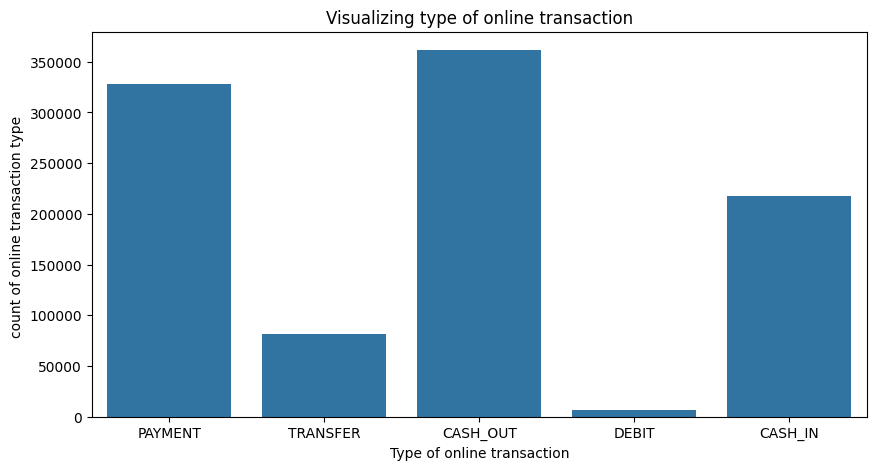

In [ ]:
#Univariate Data Analysis
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

# From the chart, it is seen that cash_out and payment is the most common type of online transaction that customers use

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

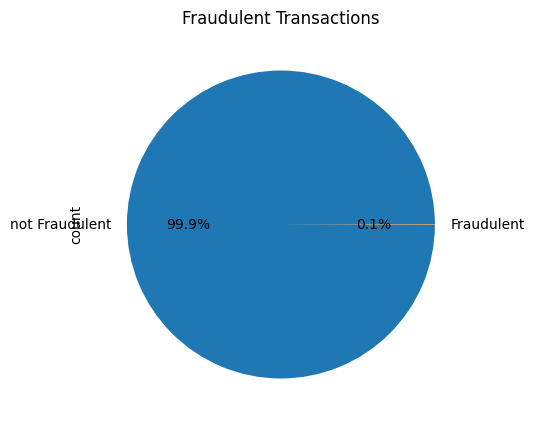

In [ ]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
data["isFlaggedFraud"] = data["isFraud"].apply(Fraud)
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
data.isFlaggedFraud.value_counts().plot.pie(autopct='%1.1f%%')

# From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balanced.

In [ ]:
data.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
not Fraudulent,994957
Fraudulent,527


# 8,213 transactions have been tagged as fraudulent in the dataset, which is approximately 12% of the total number of transactions.

<Axes: xlabel='type', ylabel='amount'>

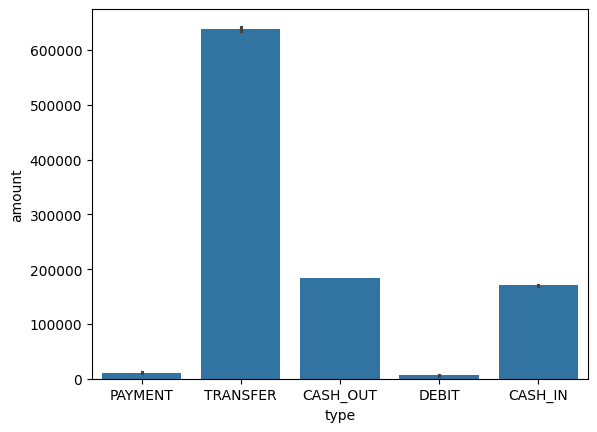

In [ ]:
#Bivariate Data Analysis
sns.barplot(x='type',y='amount',data=data)

# In this chart, 'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions.


<Axes: xlabel='type', ylabel='step'>

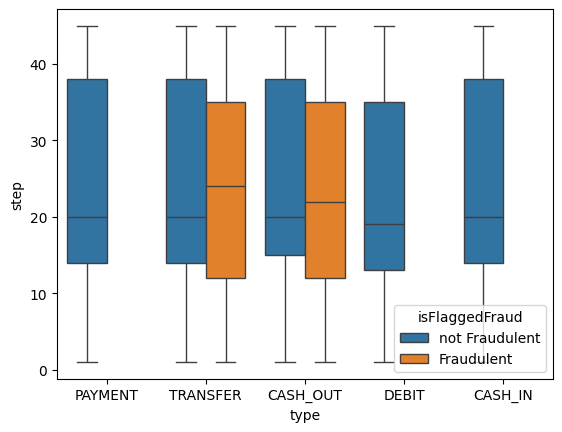

In [ ]:
#Multivariate Data Analysis
sns.boxplot(x= "type", y= "step", hue ="isFlaggedFraud", data= data)

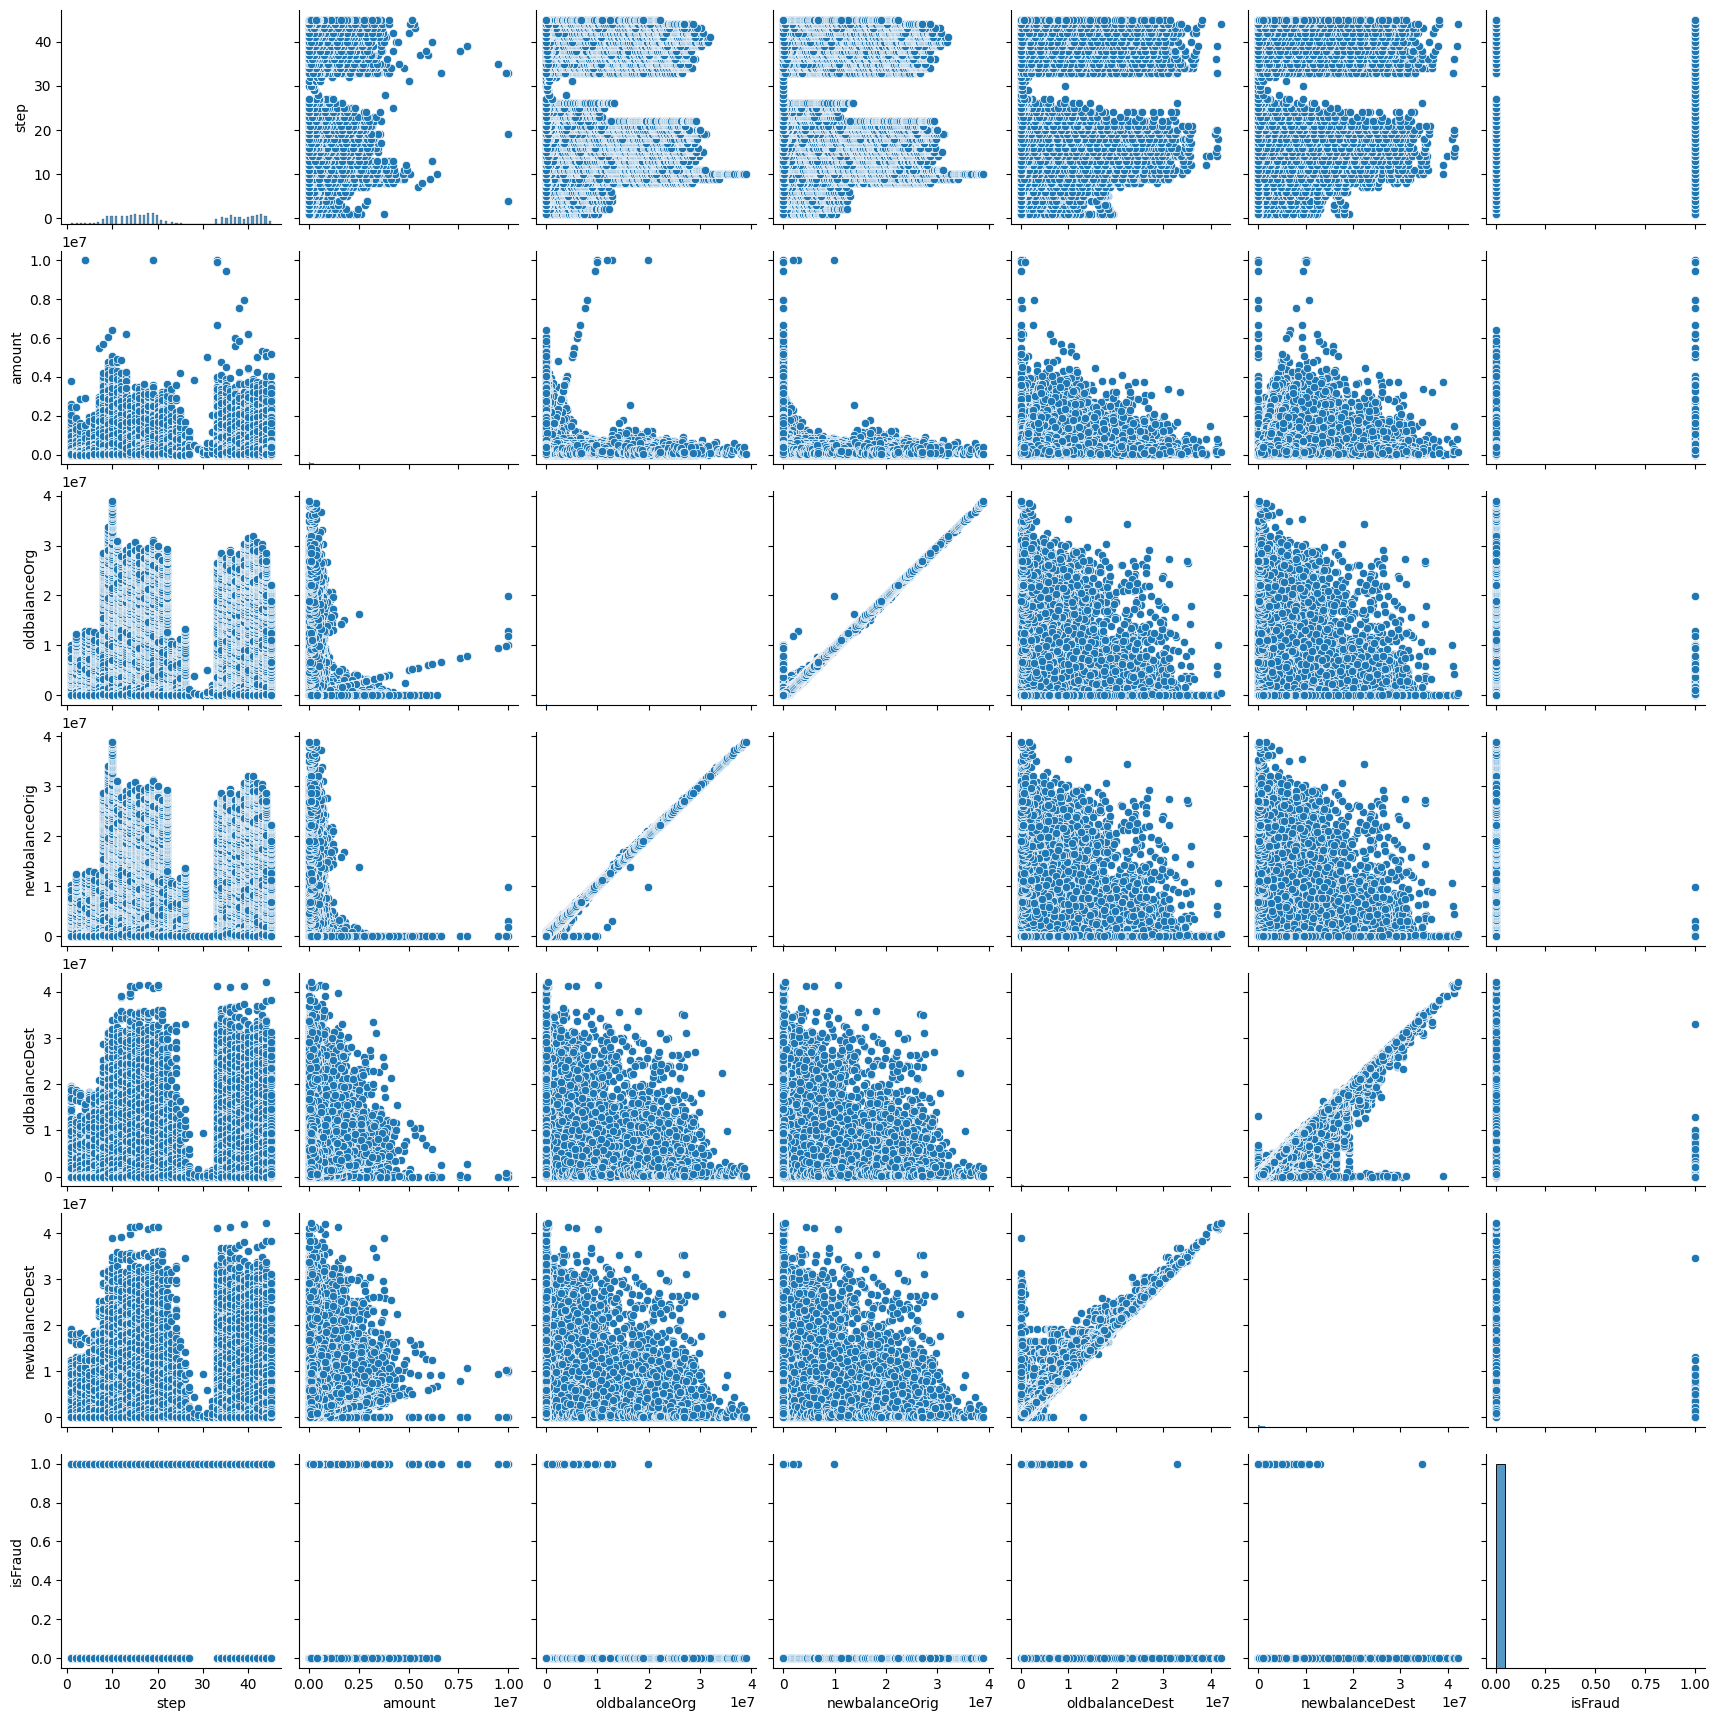

In [ ]:
sns.pairplot(data)

<Axes: >

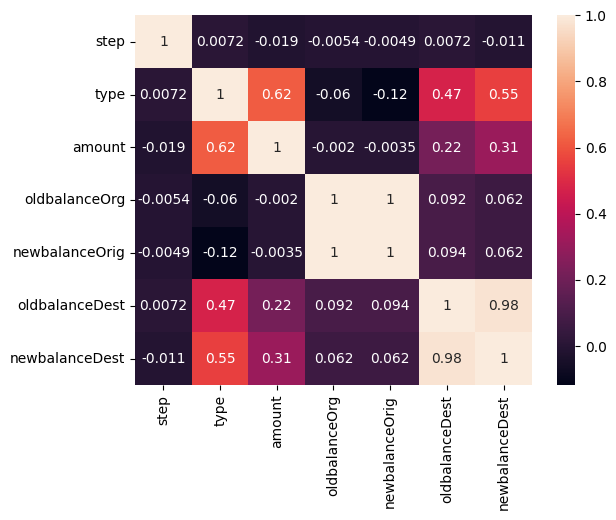

In [ ]:
#Correlation
corel = data.select_dtypes(include=np.number).corr()
sns.heatmap(corel, annot =True)

In [ ]:
data["type"] = data["type"].map({"CASHOUT": 1, "PAYMENT": 2, "CASH-IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2.0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,not Fraudulent
1,1,2.0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,not Fraudulent
2,1,4.0,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,Fraudulent
3,1,NaN,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,Fraudulent
4,1,2.0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,not Fraudulent
